In [1]:
import os
import requests
import json
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import pandas as pd
from dotenv import load_dotenv


load_dotenv()

# API keys
trafikverket_api_key = os.environ.get("TRAFIKVERKET_API_KEY")

In [2]:
URL = r"https://api.trafikinfo.trafikverket.se/v2/data.json"

XML = """\
<REQUEST>
    <LOGIN authenticationkey="cf6146ddd3ce4e18b227bb7caec4b7b4" />
    <QUERY objecttype="Camera" schemaversion="1" limit="10">
    
    </QUERY>
</REQUEST>
"""
json = {"authenticationkey":trafikverket_api_key}
headers = {"Content-Type":"application/xml"}
resp = requests.post(URL, data=XML, headers=headers)
resp2 = resp.json()

In [3]:
resp2["RESPONSE"]["RESULT"]

[{'Camera': [{'Active': True,
    'ContentType': 'Jpeg',
    'CountyNo': [14],
    'Deleted': False,
    'Direction': 270,
    'Geometry': {'SWEREF99TM': 'POINT (319317.0161776603 6472501.117938195)',
     'WGS84': 'POINT (11.9118538 58.3560753)'},
    'HasFullSizePhoto': True,
    'HasSketchImage': True,
    'IconId': 'trafficCamera',
    'Id': 'SE_STA_CAMERA_Orion_4500084',
    'ModifiedTime': '2023-04-30T08:06:39.152Z',
    'Name': 'Brattåsmotet västerut',
    'Type': 'Trafikflödeskamera',
    'PhotoTime': '2023-04-30T10:06:01.000+02:00',
    'PhotoUrl': 'https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635330.Jpeg',
    'Status': 'videoOrImagesAvailable'},
   {'Active': True,
    'ContentType': 'Jpeg',
    'CountyNo': [14],
    'Deleted': False,
    'Direction': 100,
    'Geometry': {'SWEREF99TM': 'POINT (308831.009470314 6439731.868113879)',
     'WGS84': 'POINT (11.7598543 58.05778)'},
    'HasFullSizePhoto': True,
    'HasSketchImage': True,
    'IconId': 'tr

In [4]:
cams = resp2["RESPONSE"]["RESULT"][0]["Camera"]
for cam in cams:
    print(cam["PhotoUrl"])

https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635330.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635304.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635361.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635362.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635286.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635287.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635248.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635247.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39626438.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39626697.Jpeg


In [5]:
# Query med Id-filter för att ta ut specifik kamera

URL = r"https://api.trafikinfo.trafikverket.se/v2/data.json"

XML = f"""\
<REQUEST>
    <LOGIN authenticationkey="{os.environ.get("TRAFIKVERKET_API_KEY")}" />
    <QUERY objecttype="Camera" schemaversion="1" limit="10">
    <FILTER>
        <EQ name="Id" value="SE_STA_CAMERA_Pacific_590" />
    </FILTER>
    </QUERY>
</REQUEST>
"""
json = {"authenticationkey":trafikverket_api_key}
headers = {"Content-Type":"application/xml"}
resp = requests.post(URL, data=XML, headers=headers)
resp3 = resp.json()   

In [6]:
resp3

{'RESPONSE': {'RESULT': [{'Camera': [{'Active': True,
      'ContentType': 'Jpeg',
      'CountyNo': [2, 1],
      'Deleted': False,
      'Description': 'Kameran är placerad på E4 Uppsalavägen i höjd med trafikplats Haga södra och är riktad mot Stockholm.',
      'Direction': 160,
      'Geometry': {'SWEREF99TM': 'POINT (672582.1044419459 6583538.855555298)',
       'WGS84': 'POINT (18.03592 59.35519)'},
      'HasFullSizePhoto': True,
      'HasSketchImage': True,
      'IconId': 'trafficCamera',
      'Id': 'SE_STA_CAMERA_Pacific_590',
      'Location': 'Kameran är placerad på E4 Uppsalavägen i höjd med trafikplats Haga södra och är riktad mot Stockholm.',
      'ModifiedTime': '2023-04-30T08:06:49.161Z',
      'Name': 'Tpl Haga södra',
      'Type': 'Trafikflödeskamera',
      'PhotoTime': '2023-04-21T17:28:49.000+02:00',
      'PhotoUrl': 'https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635840.Jpeg',
      'Status': 'videoOrImagesAvailable'}]}]}}

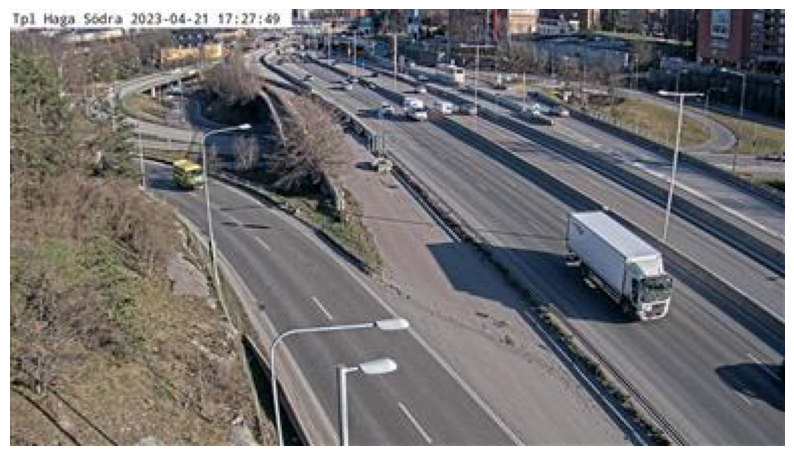

In [7]:
photo_url = resp3["RESPONSE"]["RESULT"][0]["Camera"][0]["PhotoUrl"]
response = urllib.request.urlretrieve(photo_url, "photo")
img = Image.open("photo")

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(img)
ax.set_axis_off()
plt.show()

In [11]:
# Query med Id-filter för att ta ut specifik kamera

URL = r"https://api.trafikinfo.trafikverket.se/v2/data.json"

XML = f"""\
<REQUEST>
    <LOGIN authenticationkey="{os.environ.get("TRAFIKVERKET_API_KEY")}" />
    <QUERY objecttype="Camera" schemaversion="1" limit="100">
    <FILTER>
        <EQ name="HasFullSizePhoto" value="True" />
    </FILTER>
    </QUERY>
</REQUEST>
"""
json = {"authenticationkey":trafikverket_api_key}
headers = {"Content-Type":"application/xml"}
resp = requests.post(URL, data=XML, headers=headers)
resp4 = resp.json()   
print(f"Antal kameror: {len(resp4['RESPONSE']['RESULT'][0]['Camera'])}")

Antal kameror: 100


In [12]:
resp4

{'RESPONSE': {'RESULT': [{'Camera': [{'Active': True,
      'ContentType': 'Jpeg',
      'CountyNo': [14],
      'Deleted': False,
      'Direction': 270,
      'Geometry': {'SWEREF99TM': 'POINT (319317.0161776603 6472501.117938195)',
       'WGS84': 'POINT (11.9118538 58.3560753)'},
      'HasFullSizePhoto': True,
      'HasSketchImage': True,
      'IconId': 'trafficCamera',
      'Id': 'SE_STA_CAMERA_Orion_4500084',
      'ModifiedTime': '2023-04-30T08:08:35.037Z',
      'Name': 'Brattåsmotet västerut',
      'Type': 'Trafikflödeskamera',
      'PhotoTime': '2023-04-30T10:08:01.000+02:00',
      'PhotoUrl': 'https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635330.Jpeg',
      'Status': 'videoOrImagesAvailable'},
     {'Active': True,
      'ContentType': 'Jpeg',
      'CountyNo': [14],
      'Deleted': False,
      'Direction': 100,
      'Geometry': {'SWEREF99TM': 'POINT (308831.009470314 6439731.868113879)',
       'WGS84': 'POINT (11.7598543 58.05778)'},
     

In [13]:
# Parkeringsplatser
URL = r"https://api.trafikinfo.trafikverket.se/v2/data.json"

XML = f"""\
<REQUEST>
  <LOGIN authenticationkey="{os.environ.get("TRAFIKVERKET_API_KEY")}" />
  <QUERY objecttype="Parking" schemaversion="1.4" limit="1000">
  <FILTER>
    <EQ name="CountyNo" value="2" />
  </FILTER>
  </QUERY>
</REQUEST>
"""

json = {"authenticationkey":trafikverket_api_key}
headers = {"Content-Type":"application/xml"}
resp = requests.post(URL, data=XML, headers=headers)
resp5 = resp.json()
print(len(resp5["RESPONSE"]["RESULT"][0]["Parking"]))

3


In [14]:
resp5["RESPONSE"]["RESULT"][0]

{'Parking': [{'CountyNo': [1, 2],
   'Deleted': False,
   'Equipment': [{'Type': 'refuseBin'},
    {'Type': 'toilet', 'Accessibility': 'handicappedAccessible'},
    {'Type': 'picnicFacilities'}],
   'DistanceToNearestCity': 'ca 30 km norr om Stockholm C',
   'LocationDescription': 'Ligger mellan Stockholm och Arlanda.',
   'Description': 'Vissa rastplatsmöbler är anpassade för funktionshindrade. \n\nBelysning.',
   'Facility': [{'Type': 'restaurant'}],
   'IconId': 'restArea',
   'Id': 'SE_STA_TRISSID_1_17140555',
   'Geometry': {'SWEREF99TM': 'POINT (663952.1835446616 6604988.1323403865)',
    'WGS84': 'POINT (17.9007816 59.5510025)'},
   'ModifiedTime': '2023-04-29T17:01:14.498Z',
   'Name': 'Stora Wäsby N',
   'OpenStatus': 'open',
   'OperationStatus': 'inOperation',
   'ParkingAccess': [{'SWEREF99TM': 'POINT (663951.9688579605 6604988.122962243)',
     'WGS84': 'POINT (17.9007778 59.5510025)'}],
   'Photo': [{'Title': 'Stora Wäsby norrgående',
     'Url': 'https://api.trafikinfo.t

## Gör en .tsv med alla kameror som har `FullSizePhoto`

In [18]:
URL = r"https://api.trafikinfo.trafikverket.se/v2/data.json"

XML = f"""\
<REQUEST>
  <LOGIN authenticationkey="{os.environ.get("TRAFIKVERKET_API_KEY")}" />
  <QUERY objecttype="Camera" schemaversion="1">
  <FILTER>
    <EQ name="HasFullSizePhoto" value="True" />
  </FILTER>
  </QUERY>
</REQUEST>
"""

json = {"authenticationkey":trafikverket_api_key}
headers = {"Content-Type":"application/xml"}
resp = requests.post(URL, data=XML, headers=headers)
resp6 = resp.json()
print(len(resp6["RESPONSE"]["RESULT"][0]["Camera"]))

1577


In [19]:
#df = pd.DataFrame(columns={"Namn", "Id"})

names = []
ids = []

for place in resp6["RESPONSE"]["RESULT"][0]["Camera"]:
    names.append(place["Name"])
    ids.append(place["Id"])

df = pd.DataFrame(list(zip(names, ids)), columns=["Namn", "Id"])
print(f"Shape of df: {df.shape}")
df.to_csv("kameror.tsv", sep="\t", index=False)
df.head()

Shape of df: (1577, 2)


,Namn,Id
0,Brattåsmotet västerut,SE_STA_CAMERA_Orion_4500084
1,Almökrysset österut,SE_STA_CAMERA_Orion_4500057
2,Bur nordöst,SE_STA_CAMERA_Orion_4500116
3,Bur sydväst,SE_STA_CAMERA_Orion_4500117
4,Bäckebolsmotet norrut,SE_STA_CAMERA_Orion_4500038


In [ ]:
URL = r"https://api.trafikinfo.trafikverket.se/v2/data.json"

XML = """\
<REQUEST>
  <LOGIN authenticationkey="cf6146ddd3ce4e18b227bb7caec4b7b4" />
  <QUERY objecttype="Camera" schemaversion="1">
  <FILTER>
    <EQ name="HasFullSizePhoto" value="True" />
  </FILTER>
  </QUERY>
</REQUEST>
"""

headers = {"Content-Type":"application/xml"}
resp = requests.post(URL, data=XML, headers=headers)
resp6 = resp.json()
print(len(resp6["RESPONSE"]["RESULT"][0]["Camera"]))